In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import raw data, both encoding 'iso-8859-1' and 'latin1' work in this data
trust_raw = pd.read_csv('data/WELLCOME_APCspend2013_forThinkful.csv', encoding='iso-8859-1')
trust_raw.head(25)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [44]:
# clean data of cost column
trust_raw_clean = trust_raw.copy()
trust_raw_clean = trust_raw_clean.dropna(subset=['Journal title'])
trust_raw_clean['cost_clean'] = trust_raw_clean['COST (£) charged to Wellcome (inc VAT when charged)'].\
                                str.replace('£', '').str.replace('$', '')
trust_raw_clean['cost_clean'] = trust_raw_clean['cost_clean'].astype('float')

In [66]:
trust_raw_clean['Journal title'].value_counts().head()

PLoS One                                           89
PLoS ONE                                           59
Journal of Biological Chemistry                    47
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
Name: Journal title, dtype: int64

In [68]:
# clean data of Journal title columns
# it looks like there are some journals that are actually the same but presented differently, either by lower case or
# there are leading or trailing spaces
trust_raw_clean['Journal title'] = trust_raw_clean['Journal title'].str.lower() # change to lower case
trust_raw_clean['Journal title'] = trust_raw_clean['Journal title'].apply(str.strip)

In [69]:
trust_raw_clean['Journal title'].value_counts().head()

plos one                           182
journal of biological chemistry     52
neuroimage                          29
nucleic acids research              26
plos pathogens                      22
Name: Journal title, dtype: int64

In [72]:
trust_raw_clean['Journal title'].unique()

array(['psychological medicine', 'biomacromolecules', 'j med chem',
       'j org chem', 'journal of medicinal chemistry',
       'journal of proteome research', 'mol pharm',
       'acs chemical biology',
       'journal of chemical information and modeling', 'biochemistry',
       'gastroenterology', 'journal of biological chemistry',
       'journal of immunology', 'acs chemical neuroscience', 'acs nano',
       'american chemical society', 'analytical chemistry',
       'bioconjugate chemistry',
       'journal of the american chemical society', 'chest',
       'journal of neurophysiology', 'journal of physiology',
       'the journal of neurophysiology', 'american journal of psychiatry',
       'americal journal of psychiatry', 'behavioral neuroscience',
       'emotion', 'health psychology', 'journal of abnormal psychology',
       'journal of consulting and clinical psychology',
       'journal of experimental psychology:  animal behaviour process',
       'journal of experiment

In [75]:
import re
#test = trust_raw_clean['Journal title'].apply(lambda x: re.findall('chem', x))
re.findall('chem', trust_raw_clean['Journal title'].iloc[0])

[]

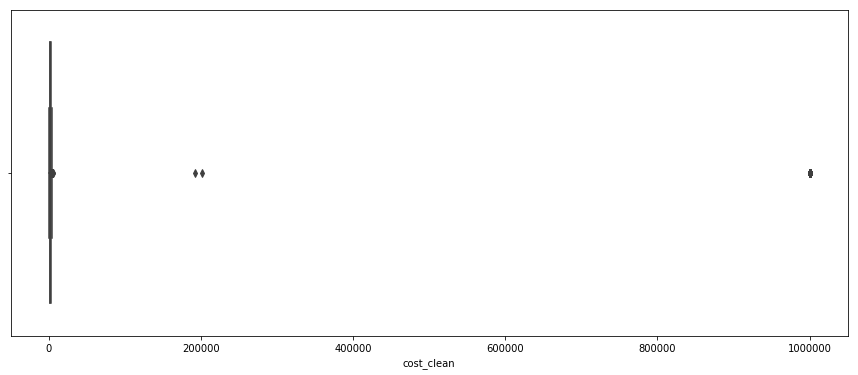

In [45]:
# take a look of the distribution of cost column to see if there is any outliers
fig, ax = plt.subplots(1, 1, figsize=(15,6))
ax = sns.boxplot(trust_raw_clean['cost_clean'])

In [46]:
# from the graph above, it looks like there are some outliers that are not plausible, it is unlikely journal cost more
# than 200K, we will use a threshold 100K to filter out the outliers and plot again
trust_raw_clean = trust_raw_clean[trust_raw_clean['cost_clean'] < 100000]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


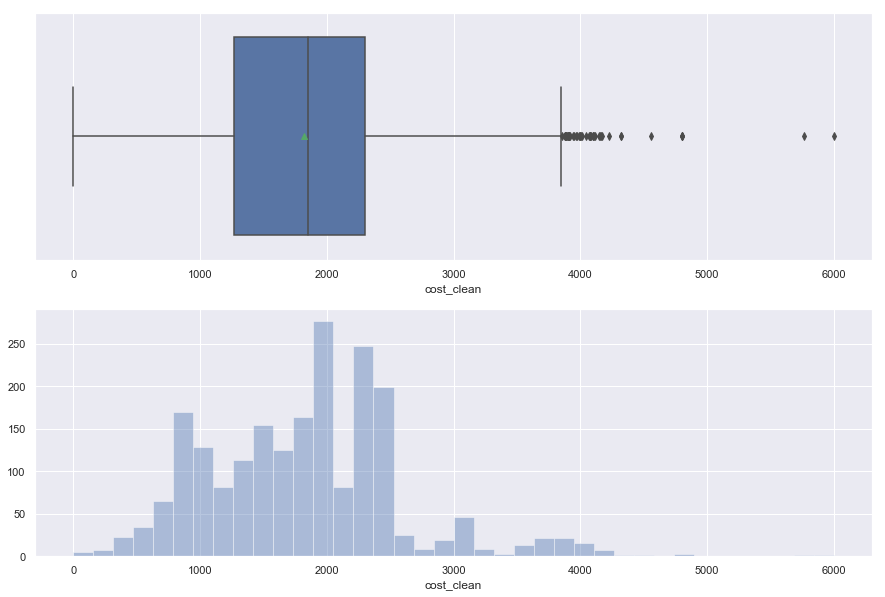

In [60]:
sns.set()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sns.boxplot(trust_raw_clean['cost_clean'], showmeans=True, ax=ax1)
sns.distplot(trust_raw_clean['cost_clean'], ax=ax2, kde=False)
plt.show()

In [61]:
# now that more information showed up, there are still some outliers that cost few K, we will keep them now since 
# there might indeed some journals that cost that much, we then begin calculating the mean, median and standard 
# deviation
# mean
print('mean:', trust_raw_clean['cost_clean'].mean())
# median
print('median:', trust_raw_clean['cost_clean'].median())
#standard deviation
print('standard deviation:', trust_raw_clean['cost_clean'].std())

mean: 1822.0559075589829
median: 1851.29
standard deviation: 767.6985537172659


In [63]:
len(trust_raw_clean['Journal title'].unique())

972

In [ ]:
trust_raw_clean['Journal title'].str.lower().unique()